### Deep Reinforcement Learning on SnL


In [23]:
# imports!!

## gym
import gym
from gym import spaces

## rest
import random
import numpy as np
import pickle
from tqdm import tqdm
from snl_gym_environment import SNL_env
import os

In [24]:
from stable_baselines3 import A2C,PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
import os


# Instantiate the env
env = SNL_env()
# check environment validity
check_env(env, warn=True)
log_dir = "./tmp/gym/A2C/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = SNL_env()
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir)
# Model
model = A2C('MlpPolicy', env=env, verbose=0, tensorboard_log="./a2c_snl_tensorboard/")

In [25]:
model.learn(total_timesteps=1000000)

In [35]:
import datetime
model.save('A2C_{}'.format(datetime.datetime.now()))

In [36]:
env=SNL_env(printing=True)
obs = env.reset()

p1_wins = 0
p2_wins = 0
ties = 0
for i in range(18000):
    action, _states = model.predict(obs)
    print(action)
    obs, rewards, dones, info = env.step(action)
    env.render(mode='console')
    #print(dones)
    if dones:
        info = env.render()
        if(info['p1_won']):
            p1_wins += 1
        if(info['p2_won']):
            p2_wins += 1
        if(info['tie']):
            ties += 1
        obs = env.reset()
        # print('p1_wins',p1_wins)
        # print('p2_wins',p2_wins)
        # print('ties',ties)
        # print("-----------")

print('p1_wins',p1_wins)
print('p2_wins',p2_wins)
print('ties',ties)
print("-----------")

################################
environment state:
die value :1.0
board state :
[[0. 0. 0.]
 [0. 0. 0.]]
player 1 init:  <snl_board_gym.Player object at 0x1653c60a0>
player 2 init:  <snl_board_gym.Player object at 0x164c20be0>
################################
0
######P1
action : 0
die:  1.0
board state:  [1. 0. 0. 0. 0. 0.]
p1 score:  1.0
p1 token positions:  [1. 0. 0.]
action type:  VALID


######P2
die:  4
board state:  [1. 0. 0. 0. 4. 0.]
p2 score:  4.0
p2 token positions:  [0. 4. 0.]


0
######P1
action : 0
die:  4
board state:  [5. 0. 0. 0. 4. 0.]
p1 score:  5.0
p1 token positions:  [5. 0. 0.]
action type:  VALID


######P2
die:  6
board state:  [ 5.  0.  0.  0. 10.  0.]
p2 score:  10.0
p2 token positions:  [ 0. 10.  0.]


2
######P1
action : 2
die:  4
board state:  [ 5.  0.  4.  0. 10.  0.]
p1 score:  9.0
p1 token positions:  [5. 0. 4.]
action type:  VALID


######P2
die:  5
board state:  [ 0.  0.  4.  5. 10.  0.]
p2 score:  15.0
p2 token positions:  [ 5. 10.  0.]


0
######P1
a

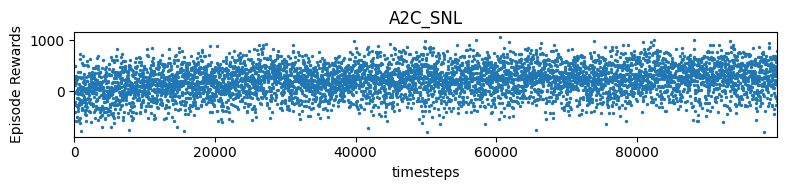

In [37]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "A2C_SNL")

In [38]:
import matplotlib.pyplot as plt
import seaborn as sb
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


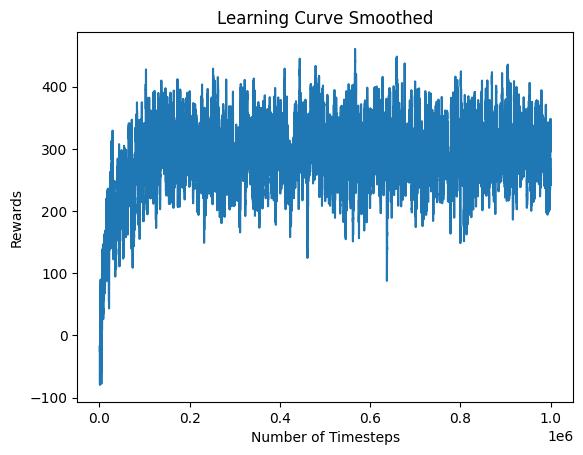

In [40]:
plot_results(log_dir)